# GAUSSIAN PROCESS REGRESSION

Chúng ta sẽ sử dụng Gaussian Process với RBF kernel để thử nghiệm khả năng thích ứng với tính đều đặn của các mục tiêu

In [ ]:
import numpy as np
from sklearn.gaussian_process import GaussianProcessRegressor
from sklearn.gaussian_process.kernels import RBF, Matern, Exponentiation, RationalQuadratic
import matplotlib.pyplot as plt
import seaborn as sns

Chúng ta sẽ thử nghiệm trên hàm mục tiêu


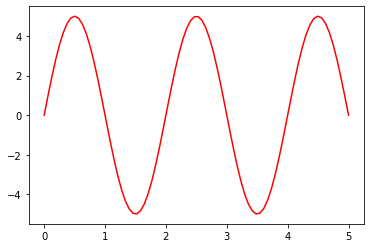

In [ ]:
d = 1
n = 80
L = 5
x = np.linspace(start=0, stop=L, num=n)
X = x.reshape(n, d)
sigma_n = 0.4
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)

def f_smooth(x):
    f = 5*np.sin((np.pi)*x)
    return(f)

f_x_smooth = f_smooth(x)


plt.plot(X, f_x_smooth, color = "red")

Tạo DATASET

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


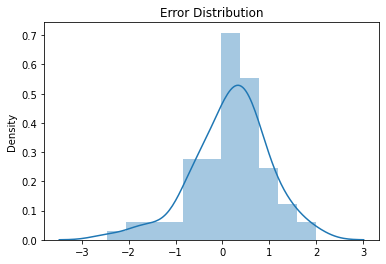

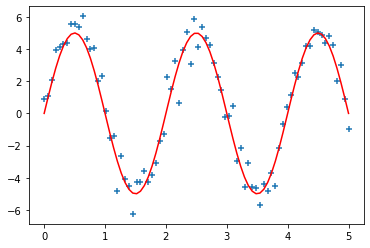

In [ ]:

sigma_n = .8
epsilon = np.random.normal(loc=0, scale=sigma_n, size=n)

y_smooth = f_x_smooth + epsilon

fig, ax = plt.subplots()

sns.distplot(epsilon, ax=ax)
ax.set(title='Error Distribution');

fig, ax = plt.subplots(1,1)

ax.plot(X, f_x_smooth, color = "red")
ax.scatter(X, y_smooth, marker = "+")

In [ ]:
n_star = n + 300
x_star = np.linspace(start=0, stop=(L+1), num=n_star)

X_star = x_star.reshape(n_star, d)

Sử dụng Gaussian Process với RBF kernel lên bộ dữ liệu




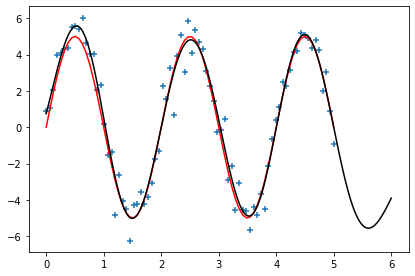

In [ ]:
l = 0.1
sigma_f = 2

RBF_kernel = 1.0 * RBF(length_scale=1, length_scale_bounds=(1e-3, 1e3))


fig, ax = plt.subplots(1,1)

fig.tight_layout()

gp = GaussianProcessRegressor(kernel=RBF_kernel, alpha=sigma_n**2, n_restarts_optimizer=10)

gp.fit(X, y_smooth)
y_pred_smooth = gp.predict(X_star)


ax.plot(X, f_x_smooth, color = "red")
ax.plot(X_star, y_pred_smooth, color = "black")
ax.scatter(X, y_smooth, marker = "+")




# KERNEL SUPPORT VECTOR MACHINE

Chúng ta sẽ dùng Kernel SVM để phân loại 1 bộ dữ liệu hoàn toàn không phân biệt tuyến tính

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import random
import math
from sklearn import svm

Tạo DATASET

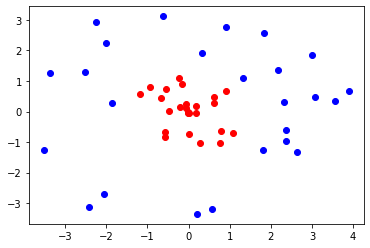

In [ ]:
n = 50
R = 4

X = np.empty((0,2), float)
Y = np.array([], int)

centerX = 0
centerY = 0

random.seed(2003)

for i in range(0, int(n/2)):
  r = R * random.uniform(0, 0.4)
  theta = random.uniform(0, 2*math.pi)

  x = centerX + r * math.cos(theta)
  y = centerY + r * math.sin(theta)

  X = np.append(X, np.array([[x,y]]), axis=0)
  Y = np.append(Y, 0)

for i in range(int(n/2), n):
  r = R * random.uniform(0.4, 1)
  theta = random.uniform(0, 2*math.pi)

  x = centerX + r * math.cos(theta)
  y = centerY + r * math.sin(theta)

  X = np.append(X, np.array([[x,y]]), axis=0)
  Y = np.append(Y, int(1))


m = (int(n/2))

plt.scatter(X[:m, 0], X[:m, 1], color = "red")
plt.scatter(X[m:, 0], X[m:, 1], color = "blue")

plt.show()

Sử dụng SVM với RBF kernel lên bộ dữ liệu

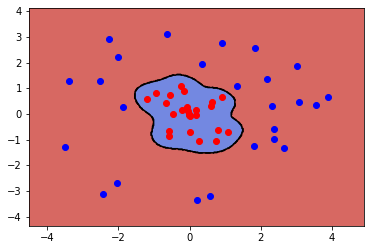

In [ ]:
def make_meshgrid(x, y, h=.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    out = ax.contourf(xx, yy, Z, **params)
    plt.contour(xx, yy, Z, colors=['k', 'k', 'k'], linestyles=['--', '-', '--'],levels=[-.5, 0, .5])
    return out


clf = svm.SVC(kernel="rbf", gamma=4, coef0 = 0)
clf.fit(X, Y)


fig, ax = plt.subplots()


X0, X1 = X[:, 0], X[:, 1]
xx, yy = make_meshgrid(X0, X1)

plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X[:m, 0], X[:m, 1], color = "red")
plt.scatter(X[m:, 0], X[m:, 1], color = "blue")

plt.show()